# Kalman Filters

The theory is as follows:

## Motion Model
We have a motion model that is derived from what laws we know the system will obey. Like that of physics (newtons equations).

$x_t = g(x_{t-1}, u_1) + \epsilon_t$

The function $g$ can be linear or non linear

It can be a matrix and look like:

(add the matrix with deta t's)

For the control variable:

The Kalman filter does not just filter data, it allows us to incorporate the control inputs of systems like robots and airplanes. Suppose we are controlling a robot. At each time step we would send steering and velocity signals to the robot based on its current position vs desired position. Kalman filter equations incorporate that knowledge into the filter equations, creating a predicted position based both on current velocity and control inputs to the drive motors. 

For a linear system the effect of control inputs can be described as a set of linear equations, which we can express with linear algebra as

$\Delta x  = Bu $

## Measurement Model

We have a measurement model, which gives the measurements that we take with say a sensor. In the real world it has inherent noise.

$z_t = H(x_t) + \delta_t$

We get measurments directly from the sensor, why do we need this model?

When calculating the residual = measured position - predicted position , if we are tracking the temperature and there is a thermometer which gives readings in voltage then residual  = (voltage) - temperature makes no sense. We need to convert the temperature into voltage so that the operation is valid. 
But we could convert voltage into temperature also right? No. We cannot do that since measurements are not invertible, we cannot directly convert position into veolcity. Whereas in converting the state, getting the position values, from the positon and velocity values is trivial. Hence we have to work in the measurement space.

residual is usually denoted by y, hence:
$$y = z - h(\overline{x})$$

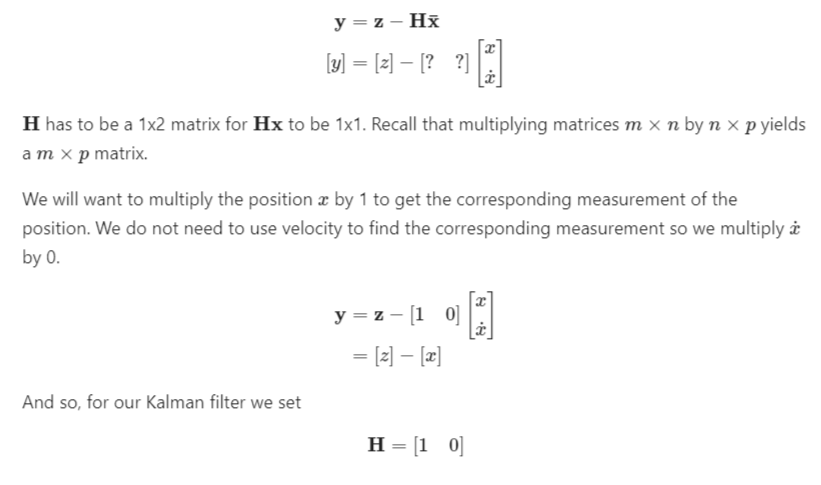





## Simulating Data for example

To simulate the true data, we can decide upon a function, or take the 

[-10.0, -9.797979797979798, -9.595959595959595, -9.393939393939394, -9.191919191919192, -8.98989898989899, -8.787878787878787, -8.585858585858587, -8.383838383838384, -8.181818181818182, -7.979797979797979, -7.777777777777778, -7.575757575757576, -7.373737373737374, -7.171717171717171, -6.96969696969697, -6.767676767676768, -6.565656565656566, -6.363636363636363, -6.161616161616162, -5.959595959595959, -5.757575757575758, -5.555555555555555, -5.353535353535354, -5.151515151515151, -4.94949494949495, -4.747474747474747, -4.545454545454546, -4.343434343434343, -4.141414141414142, -3.9393939393939394, -3.737373737373738, -3.5353535353535355, -3.333333333333333, -3.1313131313131315, -2.929292929292929, -2.7272727272727275, -2.525252525252525, -2.3232323232323235, -2.121212121212121, -1.9191919191919187, -1.717171717171718, -1.5151515151515156, -1.3131313131313131, -1.1111111111111107, -0.9090909090909101, -0.7070707070707076, -0.5050505050505052, -0.30303030303030276, -0.10101010101010033,

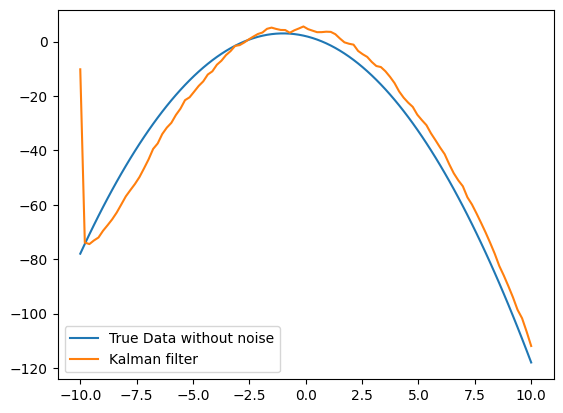

In [18]:
# Raunaks Kalman Filter:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import multivariate_normal

dt = 0.01
F = np.array([[1, dt, 0.5*dt**2], 
              [0, 1, dt], 
              [0, 0, 1]])
H = np.array([1, 0, 0]).reshape(1, 3)

P_a =  np.array([[5, 5, 5],
            [0.05, 5, 5], 
            [89, 200, 203]])

Q = np.array([[0.05, 0.05, 0.0],
            [0.05, 0.05, 0.0], 
            [0.0, 0.0, 0.0]])

R = np.array([0.5]).reshape(1, 1)

I_3 = np.eye(3)
I_1 = np.eye(1)
x_a = np.array([-10,-20,-30]).reshape(3,1)

xs = []
ys = []
preds = []
for i in np.linspace(-10,10,100):
    xs.append(i)
    ## Generate Measurements
    y_measurement =  - (i**2 + 2*i - 2)  + np.random.normal(0, 2)
    ys.append(- (i**2 + 2*i - 2))

    #Forcast Step
    x = F @ x_a
    P = F @ P_a @ F.T + Q
    preds.append(x[0][0])

    #Analysis Step
    P_xy = P@H.T
    P_yy = H@P@H.T + R

    K = P_xy @ np.linalg.inv(P_yy)
    P_a = (I_3 - K@H)@P
    # print("K.H is:", K@H)
    x_a = x + K @(y_measurement - H@x)

# self.P = I - K@ self.H@ self.P@ (I - K@ self.H) + K@ self.R@ K.T

print(xs)
print(ys)
print(preds)

plt.plot(xs,ys , label="True Data without noise")
plt.plot(xs,preds , label= "Kalman filter" )
plt.legend()


# Ensemble Kalman Filter

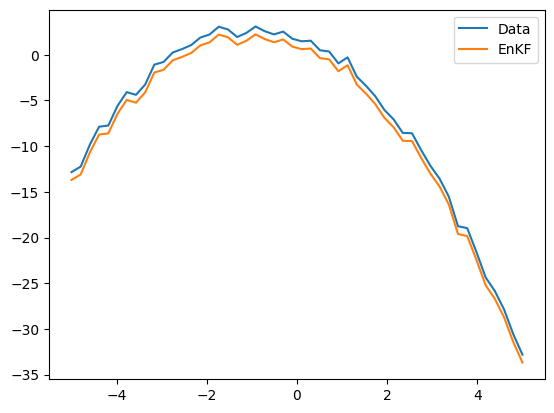

In [123]:
# Raunaks Ensemble Kalman Filter:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import multivariate_normal , randn

F = np.array([[1,1],
              [0,1]])
def hx(x):
    return np.array([x[0]])

def fx(x,dt):
    return F@x    

q=500 #no of data in ensemble of data
mean_x = [0,0] #mean of gaussian from where we are sampling
P = np.eye(2) * 1000  #??

x = multivariate_normal(mean=[0,0], cov=P, size=q).reshape(2,q)
y = np.zeros((q, 1))

for i in range(q):
    y[i] = hx(x[:,i])
y = y.T

Q = np.eye(1) *200     # process uncertainty
R = np.eye(2) *200      # state uncertainty
e = multivariate_normal([0,0], R, q)
e = e.T
e_r = multivariate_normal([0], Q, q)
e_r = e_r.T
x_a = x
ys = []
xs = []
preds=[]
true = []
# def func1(x):
#     return -5*x**2 + x**3 + 100
def func1(i):
    return - (i**2 + 2*i - 2)

for i in np.linspace(-5,5,50):
    xs.append(i) 

    ## Generate Measurements
    y_generated = func1(i) +  0.5*randn()#
    ys.append(y_generated)#
    true.append( func1(i))

    #Forecast Step
    dt = 0.0001
    x = fx(x_a,dt) + e
    for i in range(q):
        y[0,i] = hx(x[:,i])

    x_mean = np.mean(x, axis=1)[0]
    y_mean = np.mean(y)
    E = x - x_mean
    E_y = y - y_mean
    P_xy = (E@(E_y.T))/(q-1) #+ np.eye * (0.0001)
    P_yy = (E_y@(E_y.T))/(q-1) + np.eye(1) * (0.0001)

    # Analysis step:
    K = P_xy @  np.linalg.inv(P_yy)
    x_a = x + K@(y_generated + e_r - hx(x))
    x_a_mean = np.mean(x_a, axis=1)
    preds.append(x_a_mean[0])

plt.plot(xs,ys, label='Data')
# plt.plot(xs,true,label = 'true data')
plt.plot(xs,preds, label='EnKF')
plt.legend(loc='best');
plt.show()

H is [[-0.00608557  0.58607401 -0.40551105]
 [ 1.10865884 -0.6718746   0.70284283]
 [ 0.13342902  1.38234766  0.7037216 ]]


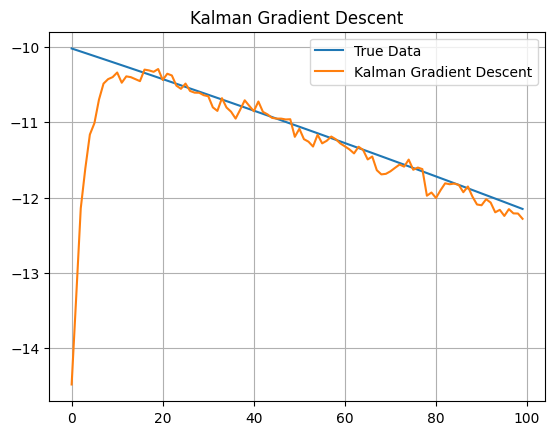

In [66]:
# Grradient Descent Kalman Filter:

import numpy as np
import matplotlib.pyplot as plt
from numpy.random import multivariate_normal
# np.random.seed(152)

dt = 0.001
F = np.array([[1, dt, 0.5*dt**2], 
              [0, 1, dt], 
              [0, 0, 1]])

H =np.random.normal(0,1,[3,3])
print("H is",H)
P_grad = np.identity(3)
Q = np.identity(3)
R = np.identity(3)

B = np.array([0,0,1])
def u_fun(t):
  return np.exp(-0.01 * t)

I_3 = np.eye(3)
I_1 = np.eye(1)
x_a = np.array([-10.0,-20.0,-30.0]).reshape(3,1)
x =  np.array([-10.0,-20.0,-30.0]).reshape(3,1)
x_grad = np.array([0.0,0.0,1.0]).reshape(3,1)
x_grads_list = []
xs = []
ys = []
preds = []
true= []
for i in range(0,100):
    xs.append(i)
    ## Generate Measurements
    x = F@x
    true.append(x[0])
    y_measurement = H@x  + 0.1*np.random.normal(0,1,3).reshape(3,1)
    # print("Hx is",H@x)
    # print("0.1*np.random.normal(0,1,3) is",0.1*np.random.normal(0,1,3))

    ys.append(y_measurement[0])
    u = 0.01*u_fun(i)

    for _ in range(40):
        ex = x_grad - (F@x_grad)+ np.dot(B,u).reshape(3,1)
        # print("F@x_grad",F@x_grad)
        # print("np.dot(B,u).reshape(3,1)",np.dot(B,u).reshape(3,1))
        # print(ex.shape)
        # print("shape of x_grad",x_grad.shape)
        # print("F@x_grad + np.dot(B,u)",F@x_grad + np.dot(B,u).reshape(3,1) ,(F@x_grad).shape  , np.dot(B,u).reshape(3,1).shape )
        # print("ex", ex)
        ey = y_measurement - (H@x_grad)
        # print("H@x_grad is",H@x_grad)
        # print("AAA",H.T@(R@ey))
        dldmu = P_grad@ex - H.T@(R@ey)
        # dldmu = np.dot(P_grad,ex) - np.dot(H.T,(np.dot(R,ey)))
        # print("iss:",dldmu)
        x_grad = x_grad - (0.05 * dldmu)

    x_grads_list.append(x_grad[0][0])

# print("ys", ys)
plt.title("Kalman Gradient Descent")
plt.plot(xs,true , label="True Data")
plt.plot(xs,x_grads_list , label= "Kalman Gradient Descent" )
plt.legend()
plt.grid()


100


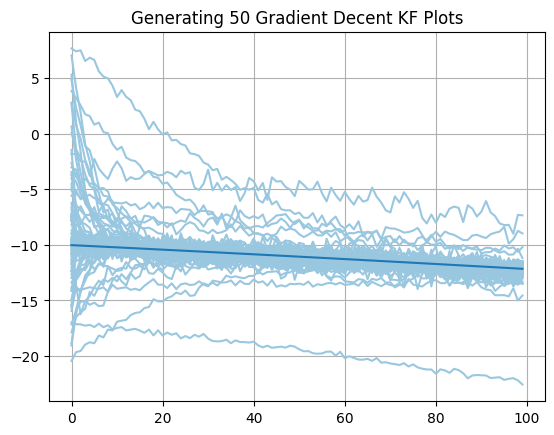

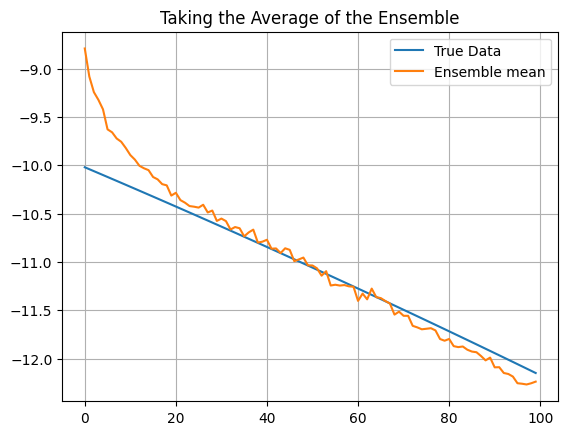

In [63]:
# Grradient Descent Kalman Filter:

import numpy as np
import matplotlib.pyplot as plt
from numpy.random import multivariate_normal
palette = plt.get_cmap('Blues')

np.random.seed(152)
m =100
def en_func():
    dt = 0.001
    F = np.array([[1, dt, 0.5*dt**2], 
                [0, 1, dt], 
                [0, 0, 1]])

    H =np.random.normal(0,1,[3,3])
    # print("H is",H)
    P_grad = np.identity(3)
    Q = np.identity(3)
    R = np.identity(3)

    B = np.array([0,0,1])
    def u_fun(t):
        return np.exp(-0.01 * t)

    I_3 = np.eye(3)
    I_1 = np.eye(1)
    x_a = np.array([-10.0,-20.0,-30.0]).reshape(3,1)
    x =  np.array([-10.0,-20.0,-30.0]).reshape(3,1)
    x_grad = np.array([0.0,0.0,1.0]).reshape(3,1)

    x_grads_list = []
    xs = []
    ys = []
    preds = []
    true= []
    for i in range(0,m):
        xs.append(i)
        ## Generate Measurements
        x = F@x
        true.append(x[0])
        y_measurement = H@x  + 0.5*np.random.normal(0,1,3).reshape(3,1)
        # print("Hx is",H@x)
        # print("0.1*np.random.normal(0,1,3) is",0.1*np.random.normal(0,1,3))

        ys.append(y_measurement[0])
        u = 0.01*u_fun(i)

        for _ in range(50):
            ex = x_grad - (F@x_grad)+ np.dot(B,u).reshape(3,1)
            # print("F@x_grad",F@x_grad)
            # print("np.dot(B,u).reshape(3,1)",np.dot(B,u).reshape(3,1))
            # print(ex.shape)
            # print("shape of x_grad",x_grad.shape)
            # print("F@x_grad + np.dot(B,u)",F@x_grad + np.dot(B,u).reshape(3,1) ,(F@x_grad).shape  , np.dot(B,u).reshape(3,1).shape )
            # print("ex", ex)
            ey = y_measurement - (H@x_grad)
            # print("H@x_grad is",H@x_grad)
            # print("AAA",H.T@(R@ey))
            dldmu = P_grad@ex - H.T@(R@ey)
            # dldmu = np.dot(P_grad,ex) - np.dot(H.T,(np.dot(R,ey)))
            # print("iss:",dldmu)
            x_grad = x_grad - (0.09 * dldmu)

        x_grads_list.append(x_grad[0][0])
    plt.plot(xs,x_grads_list , color=palette(i) ,label= "Kalman Gradient Descent" )
    # plt.legend()

    return x_grads_list, true 
# print("ys", ys)
# plt.plot(xs,true , label="True Data")
# plt.plot(xs,x_grads_list , label= "Kalman Gradient Descent" )
# plt.legend()
xs = []
for i in range(0,m):
    xs.append(i)
num = 100
ens = np.zeros(m)

for j in range(num):
    a, true = en_func()

    for i in range(len(a)):
        # value = 0
        # value = value + a[i]
        ens[i] = ens[i] + a[i]

ens =ens/ num

print(len(ens))

plt.title("Generating 50 Gradient Decent KF Plots")
plt.plot(xs,true , label="True Data")
# plt.plot(xs,ens , label="ensemble")
# plt.legend()
plt.grid()
plt.show()

plt.title("Taking the Average of the Ensemble")
plt.plot(xs,true , label="True Data")
plt.plot(xs,ens , label="Ensemble mean")
plt.legend()
plt.grid()
plt.show()

In [27]:
print(np.zeros(3),type(np.zeros(3)))
np.zeros(3) - np.eye(3)

[0. 0. 0.] <class 'numpy.ndarray'>


array([[-1.,  0.,  0.],
       [ 0., -1.,  0.],
       [ 0.,  0., -1.]])

In [49]:
np.eye(1)

array([[1.]])